In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from mlxtend.preprocessing import minmax_scaling
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

In [2]:
##define a function to plot the PCA
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs

In [3]:
train_full = pd.read_csv('train.csv',index_col = 'Id')
test_full = pd.read_csv('test.csv',index_col = 'Id')
print('train_full size',train_full.shape)
print('test_full size',test_full.shape)
train_full.head()

train_full size (1460, 80)
test_full size (1459, 79)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
##remove rows have NaN values
train_full.dropna(axis = 0,subset = ['SalePrice'],inplace = True)
y_train = train_full.SalePrice
X_train_full = train_full.drop(['SalePrice'],axis = 1)
print('X_train_full size',X_train_full.shape)
print('y_train size',len(y_train))
##do the same thing for test set
X_test = test_full
print('X_test_full size',X_test.shape)

X_train_full size (1460, 79)
y_train size 1460
X_test_full size (1459, 79)


## add new features

In [ ]:
# ##manually add more features
# ##1st feature
# X_train_1 = pd.DataFrame()
# X_train_1['LivLotRatio'] = X_train_full['GrLivArea']/X_train_full['LotArea']
# X_train_1['Spaciousness'] = (X_train_full['1stFlrSF']+X_train_full['2ndFlrSF'])/X_train_full['TotRmsAbvGrd']
# feature_outside = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
# X_train_1['TotalOutsideSF'] = np.sum(X_train_full[feature_outside],axis = 1)

# ##do the same for test set
# X_test_1 = pd.DataFrame()
# X_test_1['LivLotRatio'] = X_test['GrLivArea']/X_test['LotArea']
# X_test_1['Spaciousness'] = (X_test['1stFlrSF']+X_test['2ndFlrSF'])/X_test['TotRmsAbvGrd']
# feature_outside = ['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
# X_test_1['TotalOutsideSF'] = np.sum(X_test[feature_outside],axis = 1)


In [ ]:
# ##2nd feature
# X_train_2 = pd.get_dummies(X_train_full['BldgType'],prefix = 'Bldg')
# X_train_2 = X_train_2.mul(X_train_full['GrLivArea'],axis = 0)

# ##test set
# X_test_2 = pd.get_dummies(X_test['BldgType'],prefix = 'Bldg')
# X_test_2 = X_test_2.mul(X_test['GrLivArea'],axis = 0)

In [ ]:
# ## 3rd feature
# X_train_3 = pd.DataFrame()
# feature_porch  =['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
# X_train_3['PorchTypes'] = X_train_full[feature_porch].gt(0).sum(axis = 1)
# ##test set
# X_test_3 = pd.DataFrame()
# #feature_porch  =['WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
# X_test_3['PorchTypes'] = X_test[feature_porch].gt(0).sum(axis = 1)

In [ ]:
# ## 4th feature
# X_train_4 = pd.DataFrame()
# X_train_4['MedNhbdArea'] = X_train_full.groupby('Neighborhood')['GrLivArea'].transform('median')

# ##test set
# X_test_4 = pd.DataFrame()
# X_test_4['MedNhbdArea'] = X_test.groupby('Neighborhood')['GrLivArea'].transform('median')


In [ ]:
# ##add all four features into the training set and test set
# X_train_full = X_train_full.join([X_train_1,X_train_2,X_train_3,X_train_4])
# X_train_full.head()
# ##test set
# X_test = X_test.join([X_test_1,X_test_2,X_test_3,X_test_4])
# X_test.head()

## get numeric columns and categorical columns

In [5]:
##split columns with only numbers and columns with only categorical variabels
col_category = [col for col in X_train_full.columns
              if X_train_full[col].dtypes == 'object']

col_numeric = [col for col in X_train_full.columns
              if X_train_full[col].dtypes in ['int64','float64']]


##total number of columns in the final training set
col_to_keep = col_category + col_numeric
print('categorical columns: \n',len(col_category))
print('numeric columns: \n',len(col_numeric))
print('# of columns to keep: \n',len(col_to_keep))

categorical columns: 
 43
numeric columns: 
 36
# of columns to keep: 
 79


In [6]:
##split training set and validation set
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train,train_size = 0.8,test_size= 0.2,random_state = 0)

In [7]:
##check size
print('X_train shape: \n',X_train.shape)
print('X_valid shape: \n',X_valid.shape)
print([len(y_train),len(y_valid)])

X_train shape: 
 (1168, 79)
X_valid shape: 
 (292, 79)
[1168, 292]


In [8]:
##get categorical columns of trainset and valid set
X_train_category = X_train[col_category]
X_valid_category = X_valid[col_category]
X_test_category = X_test[col_category]
##find columns with good features and columns with bad features
##check if all faetures of valid set is consistent with all features of training set
good_col_category = [col for col in col_category if 
                   set(X_valid_category[col]).issubset(set(X_train_category[col]))]
bad_col_category = list(set(col_category)-set(good_col_category))
##remove bad features for prediction
X_train_category = X_train_category.drop(bad_col_category,axis = 1)
X_valid_category = X_valid_category.drop(bad_col_category,axis = 1)
X_test_category = X_test_category.drop(bad_col_category,axis = 1)

In [10]:
##based on feature check between training set and validation set
print(len(good_col_category))
print("# of bad features to be removed: ",len(bad_col_category))
print(X_train_category.shape)
print(X_valid_category.shape)
print(X_test_category.shape)

39
# of bad features to be removed:  4


In [13]:
##after check the validation set, now check the test set
good2_col_category = [col for col in good_col_category if
                     set(X_test_category[col]).issubset(set(X_train_category[col]))]
bad2_col_category = list(set(good_col_category)-set(good2_col_category))
##remove bad features
X_train_category = X_train_category.drop(bad2_col_category,axis = 1)
X_valid_category = X_valid_category.drop(bad2_col_category,axis = 1)
X_test_category = X_test_category.drop(bad2_col_category,axis = 1)

In [14]:
##based on feature check between training set and test set
print(len(good2_col_category))
print("# of bad features to be removed: ",len(bad2_col_category))

33
# of bad features to be removed:  6


In [16]:
## shape
print(X_train_category.shape)
print(X_valid_category.shape)
print(X_test_category.shape)

(1168, 33)
(292, 33)
(1459, 33)


In [17]:
##fill NaN values with most frequent values for categorical variables
category_imputer = SimpleImputer(strategy = 'most_frequent')
X_train_category_impute = pd.DataFrame(category_imputer.fit_transform(X_train_category[good2_col_category]),
                                       index = X_train_category.index)
X_valid_category_impute = pd.DataFrame(category_imputer.transform(X_valid_category[good2_col_category]),
                                       index = X_valid_category.index)
X_test_category_impute = pd.DataFrame(category_imputer.transform(X_test_category[good2_col_category]),
                                      index = X_test_category.index)
##add column names
X_train_category_impute.columns = X_train_category.columns
X_valid_category_impute.columns = X_valid_category.columns
X_test_category_impute.columns = X_test_category.columns

In [ ]:
##note that remvoe the rows of 'Partial' values of the 'SaleCondition' columns does not make predictions more accurate!!!!!!

# ##cleaning based on "SaleCondition", we should remove rows with "Partial" since the transaction actually does not successful
# row_drop_salecondition_train = np.where(X_train_category_impute['SaleCondition']=='Partial')
# row_drop_salecondition_valid = np.where(X_valid_category_impute['SaleCondition']=='Partial')
# #row_drop_salecondition_test = np.where(X_test_category_impute['SaleCondition']=='Partial')
# # print(row_drop_salecondition_train)
# # print(row_drop_salecondition_valid)
# # print(row_drop_salecondition_test)

# ##drop these rows for train set adn validation set, but not for test set!!!
# X_train_category_impute = X_train_category_impute.drop(row_drop_salecondition_train[0])
# X_valid_category_impute = X_valid_category_impute.drop(row_drop_salecondition_valid[0])
# print(X_train_category_impute['SaleCondition'].unique())
# print(X_valid_category_impute['SaleCondition'].unique())

In [ ]:
# ##for features with more than 10 unique values, we use ordinal encoding
# feature_ordinal = [col for col in good_col_category
#                   if X_train_category_impute[col].nunique() > 10]

# ordinal_encoder = OrdinalEncoder()
# X_train_category_impute[feature_ordinal] = ordinal_encoder.fit_transform(X_train_category_impute[feature_ordinal])
# X_valid_category_impute[feature_ordinal] = ordinal_encoder.transform(X_valid_category_impute[feature_ordinal])
# X_test_category_impute[feature_ordinal] = ordinal_encoder.transform(X_test_category_impute[feature_ordinal])

# ##for categorical features with more than 10 unique values, if we do not use ordianl ecoders, but factorize() function
# for col in feature_ordinal:
#     X_train_category_impute[col],_ = X_train_category_impute[col].factorize()
#     X_valid_category_impute[col],_ = X_valid_category_impute[col].factorize()
#     X_test_category_impute[col],_ = X_test_category_impute[col].factorize()

In [18]:
##onehot encoder (perform better than ordinal encoding in this case)
##!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##we denifintely need to remove bad features!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
feature_ordinal = []
feature_onehot = list(set(good2_col_category)-set(feature_ordinal))
oh_encoder = OneHotEncoder(handle_unknown  ='ignore',sparse = False)
X_train_category_impute_oh = pd.DataFrame(oh_encoder.fit_transform(X_train_category_impute[feature_onehot]),
                                          index = X_train_category_impute.index)
X_valid_category_impute_oh = pd.DataFrame(oh_encoder.transform(X_valid_category_impute[feature_onehot]),
                                         index = X_valid_category_impute.index)
X_test_category_impute_oh = pd.DataFrame(oh_encoder.transform(X_test_category_impute[feature_onehot]),
                                        index = X_test_category_impute.index)

X_train_category_impute_oh.index = X_train_category_impute.index
X_valid_category_impute_oh.index = X_valid_category_impute.index
X_test_category_impute_oh.index = X_test_category_impute.index

In [19]:
##deal with numeric columns: fill NaN values with mean vaues of each column
X_train_numeric = X_train[col_numeric]
X_valid_numeric = X_valid[col_numeric]
X_test_numeric = X_test[col_numeric]
print('shape of numeric columns of training set: \n',X_train_numeric.shape)
print('shape of numeric columns of valid set: \n',X_valid_numeric.shape)
print('shape of numeric columns of test set: \n',X_test_numeric.shape)
##fill NaN values with means of each column
numeric_imputer = SimpleImputer(strategy = 'median')
X_train_numeric_impute = pd.DataFrame(numeric_imputer.fit_transform(X_train_numeric),index = X_train_numeric.index)
X_valid_numeric_impute = pd.DataFrame(numeric_imputer.transform(X_valid_numeric),index = X_valid_numeric.index)
X_test_numeric_impute = pd.DataFrame(numeric_imputer.transform(X_test_numeric),index = X_test_numeric.index)
##return names of columns
X_train_numeric_impute.columns = X_train_numeric.columns
X_valid_numeric_impute.columns = X_valid_numeric.columns
X_test_numeric_impute.columns = X_test_numeric.columns

shape of numeric columns of training set: 
 (1168, 36)
shape of numeric columns of valid set: 
 (292, 36)
shape of numeric columns of test set: 
 (1459, 36)


In [20]:
##PCA
##PCA can only work for nomrlaized numeric columns
##first standardize the faetures
X_train_standardized = (X_train_numeric_impute-X_train_numeric_impute.mean(axis = 0))/X_train_numeric_impute.std(axis = 0)
X_valid_standardized = (X_valid_numeric_impute-X_valid_numeric_impute.mean(axis = 0))/X_valid_numeric_impute.std(axis = 0)
X_test_standardized = (X_test_numeric_impute-X_test_numeric_impute.mean(axis = 0))/X_test_numeric_impute.std(axis = 0)

In [21]:
##PCA fit
pca = PCA()
X_train_pca_temp = pca.fit_transform(X_train_standardized)
component_names = [f"PC{i+1}" for i in range(X_train_pca_temp.shape[1])]
X_train_pca = pd.DataFrame(X_train_pca_temp,columns = component_names,index = X_train_standardized.index)
X_train_standardized = X_train_standardized.join(X_train_pca,how = 'left')
##valid set
X_valid_pca_temp = pca.transform(X_valid_standardized)
X_valid_pca = pd.DataFrame(X_valid_pca_temp,columns = component_names,index = X_valid_standardized.index)
X_valid_standardized = X_valid_standardized.join(X_valid_pca,how = 'left')
##test set
X_test_pca_temp = pca.transform(X_test_standardized)
X_test_pca = pd.DataFrame(X_test_pca_temp,columns = component_names,index = X_test_standardized.index)
X_test_standardized = X_test_standardized.join(X_test_pca,how = 'left')
## (check if index are match!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!)

array([<AxesSubplot:title={'center':'% Explained Variance'}, xlabel='Component'>,
       <AxesSubplot:title={'center':'% Cumulative Variance'}, xlabel='Component'>],
      dtype=object)

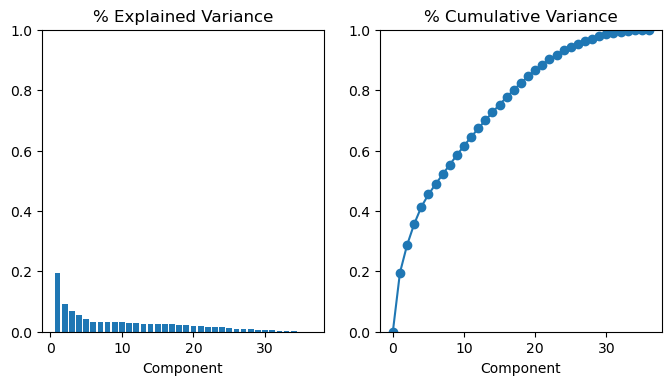

In [22]:
plot_variance(pca)

In [23]:
# X_train_model = pd.concat([X_train_numeric_impute,X_train_category_impute_oh],axis = 1)
# X_valid_model = pd.concat([X_valid_numeric_impute,X_valid_category_impute_oh],axis = 1)
# X_test_model = pd.concat([X_test_numeric_impute,X_test_category_impute_oh],axis = 1)

# ##if we use both OneHot encoder and ordinal encoder and also do a PCA
# X_train_model = pd.concat([X_train_standardized,X_train_category_impute_oh,X_train_category_impute[feature_ordinal]],axis = 1)
# X_valid_model = pd.concat([X_valid_standardized,X_valid_category_impute_oh,X_valid_category_impute[feature_ordinal]],axis = 1)
# X_test_model = pd.concat([X_test_standardized,X_test_category_impute_oh,X_test_category_impute[feature_ordinal]],axis = 1)

##if we do PCA
X_train_model = pd.concat([X_train_standardized,X_train_category_impute_oh],axis = 1)
X_valid_model = pd.concat([X_valid_standardized,X_valid_category_impute_oh],axis = 1)
X_test_model = pd.concat([X_test_standardized,X_test_category_impute_oh],axis = 1)

In [ ]:
# ##tune the XGBoost hyperparametres
# ##define a function to implement the XGBoost algorithm (version without  cross-validation)
# sen_n_estimators = np.arange(50,1000,50)
# alpha_sen = np.arange(0.01,0.1,0.01)
# sen_XGBoost_res = np.zeros((np.arange(50,1000,50).shape[0],np.arange(0.01,0.1,0.01).shape[0]))
# def sen_XGBoost(n_estimators,alpha):
#     model = XGBRegressor(n_estimators = n_estimators,learning_rate = alpha,n_jobs = 4,random_state = 0)
#     model.fit(X_train_model,y_train)
#     preds_valid = model.predict(X_valid_model)
#     return mean_absolute_error(preds_valid,y_valid)
# i = j =0
# for i in range(sen_XGBoost_res.shape[0]):
#     for j in range(sen_XGBoost_res.shape[1]):
#         sen_XGBoost_res[i,j] = sen_XGBoost(sen_n_estimators[i],alpha_sen[j])

In [ ]:
# # plt.figure(figsize  = (14,9))
# # plt.plot(sen_n_estimators,sen_XGBoost_res)
# np.argmin(sen_XGBoost_res)
# np.where(sen_XGBoost_res==sen_XGBoost_res.min())
# sen_XGBoost_res[2,5]
# print([sen_n_estimators[2],alpha_sen[5]])

In [24]:
##5-fold cross-validation
X_train_model['SalePrice'] = y_train
X_valid_model['SalePrice'] = y_valid
X_full_model = pd.concat([X_train_model,X_valid_model],axis = 0)
X_full_model_cv = X_full_model.copy()
y_full_model_cv  =X_full_model_cv.pop('SalePrice')

In [25]:
import timeit
begin = timeit.default_timer()
# sen_n_estimators = np.arange(100,1000,100)
# alpha_sen = np.arange(0.01,0.1,0.01)
sen_n_estimators = np.arange(100,1000,100)
alpha_sen = np.arange(0.01,0.1,0.01)
sen_scores = np.zeros((sen_n_estimators.shape[0],alpha_sen.shape[0]))
for i in range(sen_n_estimators.shape[0]):
    for j in range(alpha_sen.shape[0]):
        model_XGB = XGBRegressor(n_estimators = sen_n_estimators[i],learning_rate = alpha_sen[j],random_state = 0)
        sen_scores[i,j] = np.mean(-1*cross_val_score(model_XGB,X_full_model_cv,y_full_model_cv,cv = 5,
                                                     scoring = 'neg_mean_absolute_error'))
end = timeit.default_timer()
print('Time elapse:',end-begin)
sen_scores
# ##define a fucntion to conduct 5-fold cross-validation
# scores = -1*cross_val_score(model_XGB,X_full_model_cv,y_full_model_cv,cv = 5,scoring = 'neg_mean_absolute_error',
#                            n_jobs = 4)

Time elapse: 500.1300633999999


array([[68313.14297009, 28606.88444456, 18078.84187446, 16171.64517605,
        15716.43901167, 15649.54412725, 15650.39370452, 15637.29728168,
        15611.70777772],
       [28883.19144371, 16068.0006555 , 15660.12790828, 15597.39284033,
        15474.98461045, 15549.08637093, 15582.08504923, 15576.40702857,
        15580.39715593],
       [18119.69335135, 15604.76731057, 15590.26535477, 15540.60556774,
        15460.23301851, 15577.91779217, 15578.17063356, 15585.42380405,
        15590.8248796 ],
       [16139.12971961, 15536.58862104, 15556.56516749, 15548.50034782,
        15475.66323844, 15580.98007812, 15570.49355201, 15593.46789651,
        15587.21680758],
       [15772.27292915, 15480.45120131, 15557.75658711, 15559.2367348 ,
        15471.00585402, 15576.43964576, 15567.32138271, 15593.89252461,
        15587.14922143],
       [15640.1301905 , 15454.65550086, 15549.82920056, 15570.92618793,
        15468.93690871, 15579.13725653, 15568.22230843, 15593.67572774,
        155

In [28]:
##plot the sensitivity analysis results
print(np.min(sen_scores))
print(np.where(sen_scores==np.min(sen_scores)))
print("Minimum MAE = ",sen_scores[np.where(sen_scores==np.min(sen_scores))])
print("n_estimators = ",sen_n_estimators[8])
print("alpha = ",alpha_sen[1])

15443.682999785957
(array([8], dtype=int64), array([1], dtype=int64))
Minimum MAE =  [15443.68299979]
n_estimators =  900
alpha =  0.02


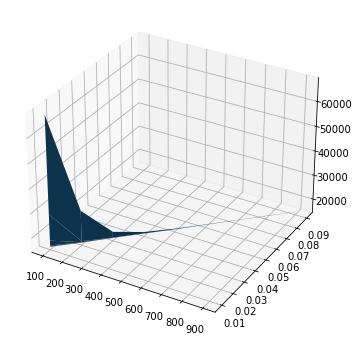

In [26]:
##plot in a 2D surface curve
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1,projection = '3d')
ax.plot_surface(sen_n_estimators,alpha_sen,sen_scores)

In [29]:
##plot the parameter tuning results
##candidate combination: (400,0.03)
import timeit
begin = timeit.default_timer()
sen_n_estimators = 900
alpha_sen = 0.02
sen_scores = []
model_XGB = XGBRegressor(n_estimators = sen_n_estimators,learning_rate = alpha_sen,random_state = 0)
sen_scores.append(np.mean(-1*cross_val_score(model_XGB,X_full_model_cv,y_full_model_cv,cv = 5,
                                                     scoring = 'neg_mean_absolute_error')))
end = timeit.default_timer()
print('Time elapse:',end-begin)
sen_scores

Time elapse: 10.131760299999996


[15443.682999785957]

In [ ]:
# np.where(sen_scores.min()==sen_scores)
# sen_scores[18,1]
# sen_n_estimators[18]

In [30]:
##combine tain adn valid
X_train_submit = pd.concat([X_train_model,X_valid_model],axis = 0)
y_train_submit = y_train.append(y_valid)

In [31]:
##XGBoost
##(400,0.03)
model2 = XGBRegressor(n_estimators = 900,learning_rate = 0.02,n_jobs = 4,random_state = 0)
model2.fit(X_full_model_cv,y_full_model_cv)
preds_test = model2.predict(X_test_model)
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)